<a href="https://colab.research.google.com/github/GRAMUSI016/Oasis_infobyte/blob/main/Wine__Quality__Prediction_DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("/content/WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data = data.drop(columns='Id',axis=1,inplace=False)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [ ]:
data.shape

(1143, 12)

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
for col in data.columns:
    print(f"Top 3 most frequent values in column '{col}':")
    print(data[col].value_counts().head(3))
    print("=======================")

Top 3 most frequent values in column 'fixed acidity':
fixed acidity
7.2    43
7.1    41
7.0    40
Name: count, dtype: int64
Top 3 most frequent values in column 'volatile acidity':
volatile acidity
0.60    32
0.50    32
0.43    31
Name: count, dtype: int64
Top 3 most frequent values in column 'citric acid':
citric acid
0.00    99
0.49    47
0.24    42
Name: count, dtype: int64
Top 3 most frequent values in column 'residual sugar':
residual sugar
2.0    107
2.1    103
1.8     92
Name: count, dtype: int64
Top 3 most frequent values in column 'chlorides':
chlorides
0.080    48
0.077    41
0.074    38
Name: count, dtype: int64
Top 3 most frequent values in column 'free sulfur dioxide':
free sulfur dioxide
6.0     99
5.0     80
12.0    58
Name: count, dtype: int64
Top 3 most frequent values in column 'total sulfur dioxide':
total sulfur dioxide
28.0    36
15.0    28
14.0    27
Name: count, dtype: int64
Top 3 most frequent values in column 'density':
density
0.9976    27
0.9972    25
0.9968 

<ipython-input-8-86b2fb48159f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=quality_counts.index, y=quality_counts.values, palette=["blue", "red", "pink"])
<ipython-input-8-86b2fb48159f>:3: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sb.barplot(x=quality_counts.index, y=quality_counts.values, palette=["blue", "red", "pink"])


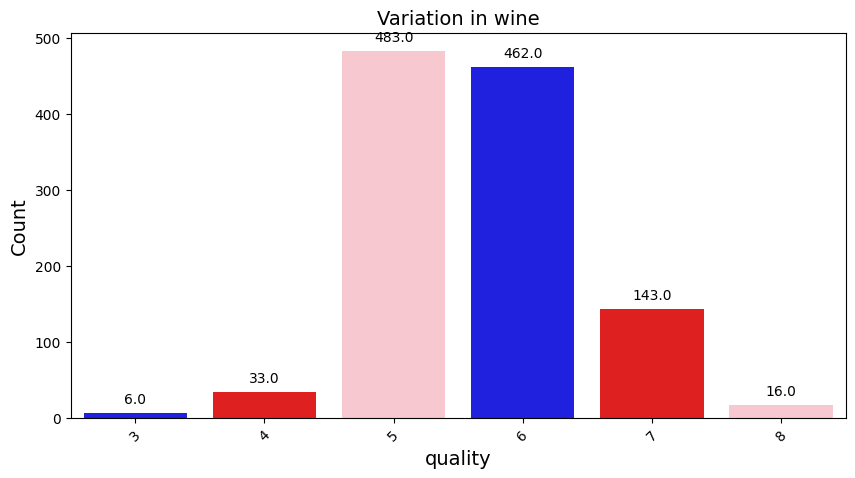

In [ ]:
quality_counts = data['quality'].value_counts()
plt.figure(figsize=(10, 5))
ax = sb.barplot(x=quality_counts.index, y=quality_counts.values, palette=["blue", "red", "pink"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
plt.title("Variation in wine", fontsize=14)
plt.xlabel("quality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
quality_counts

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

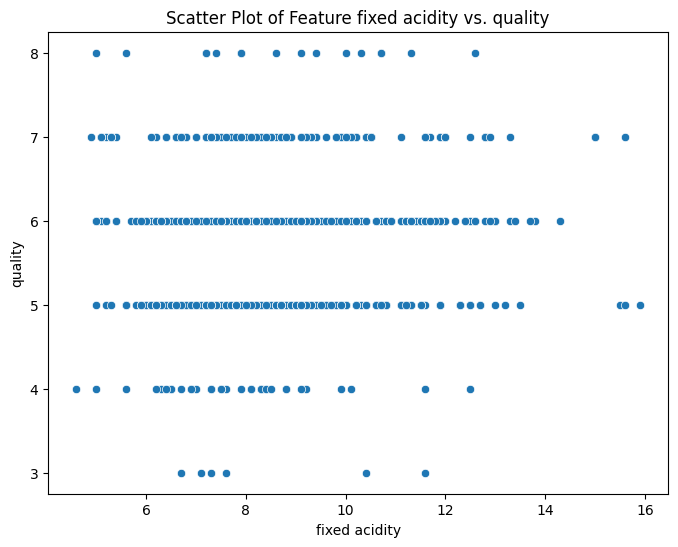

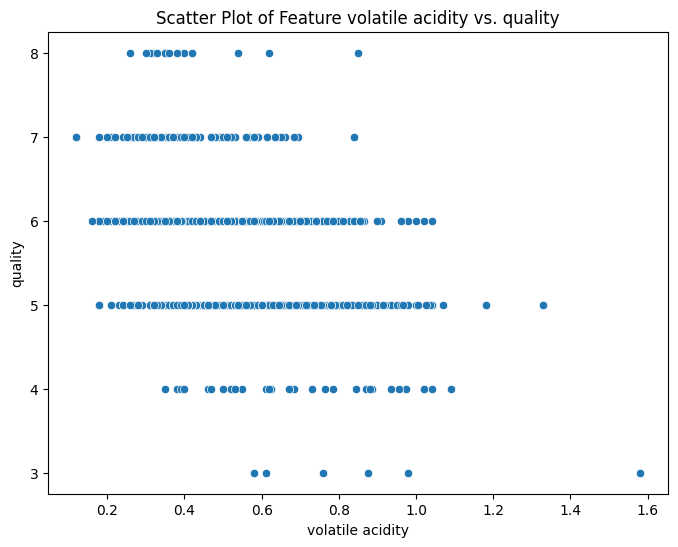

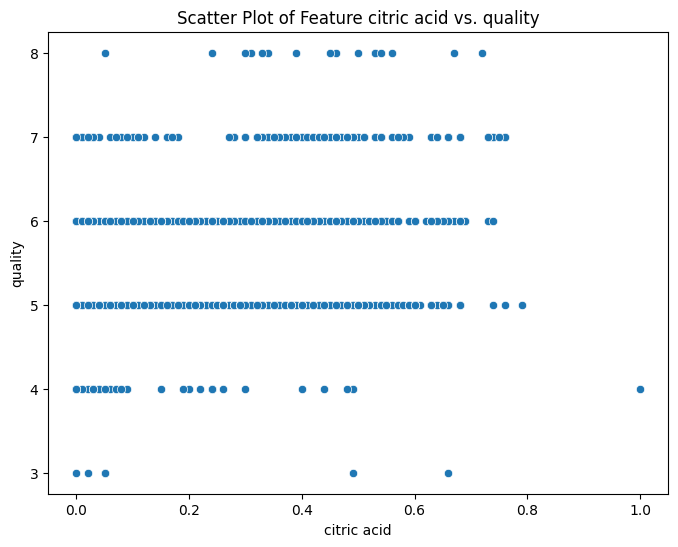

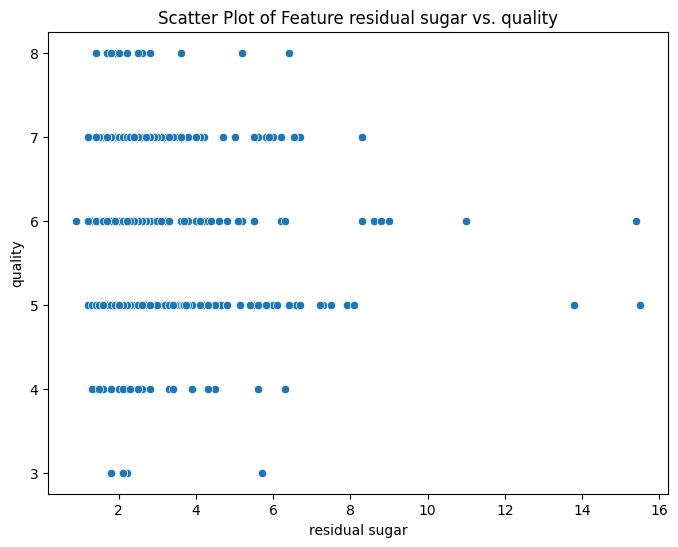

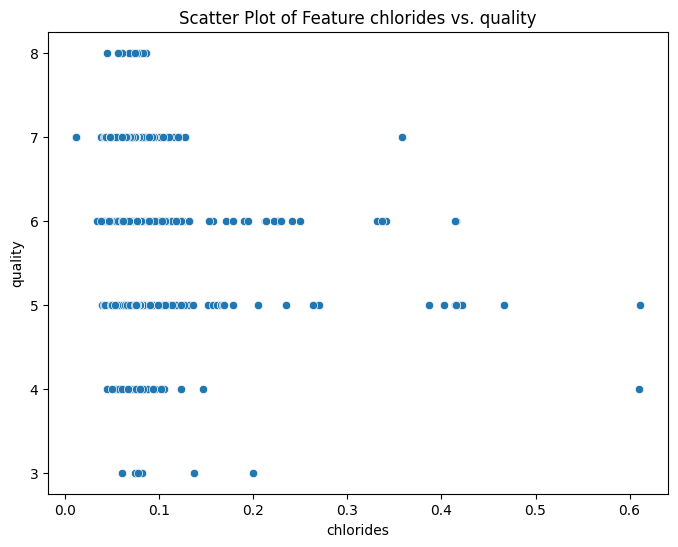

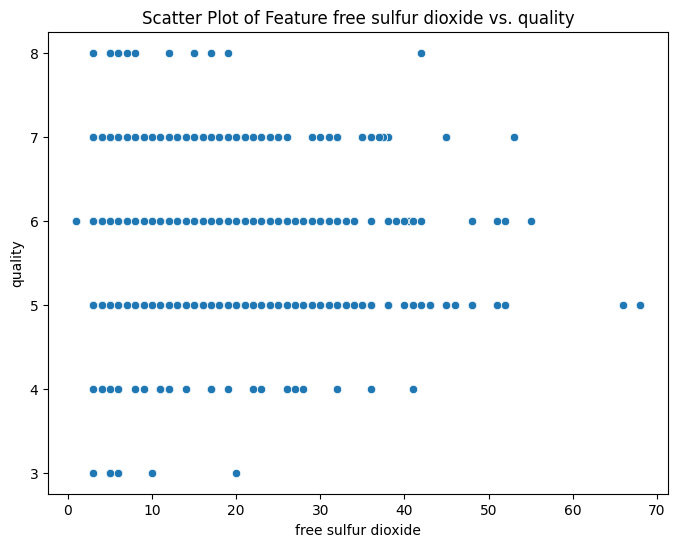

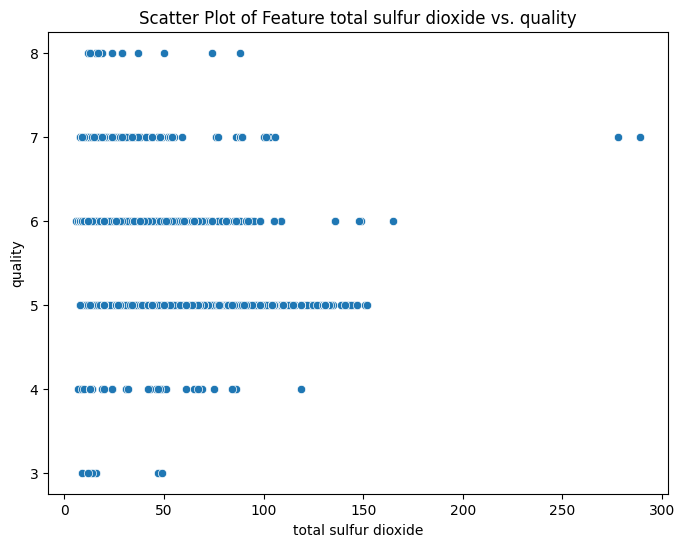

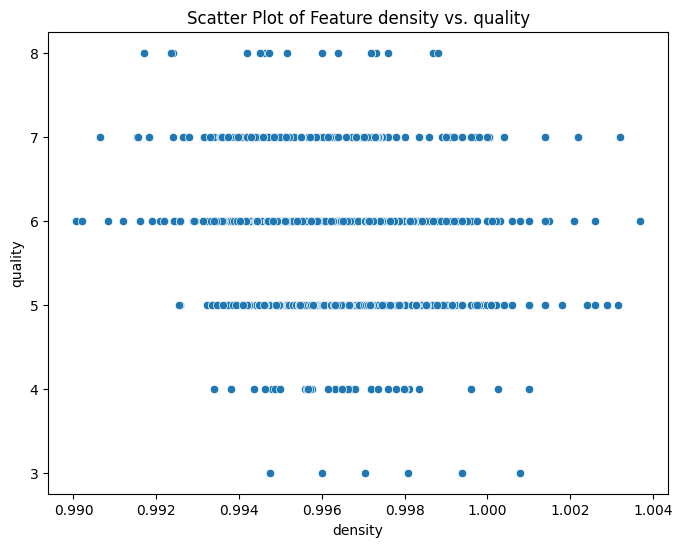

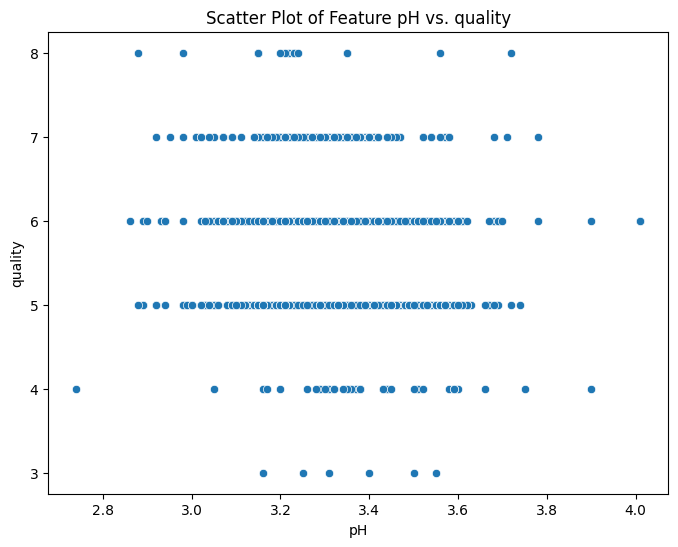

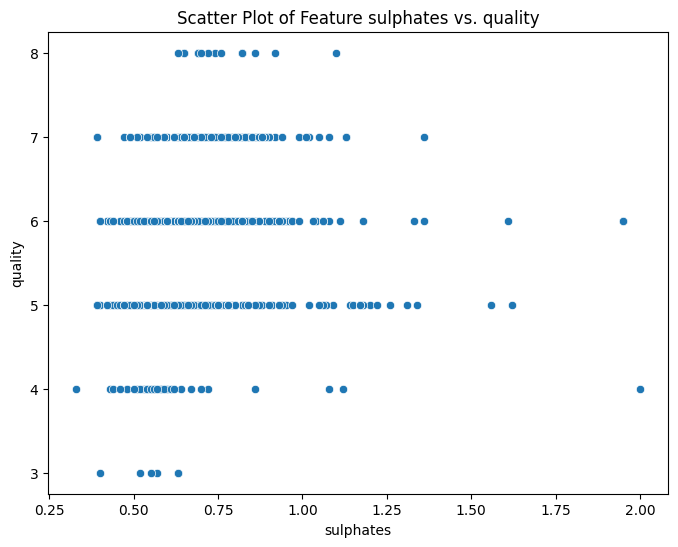

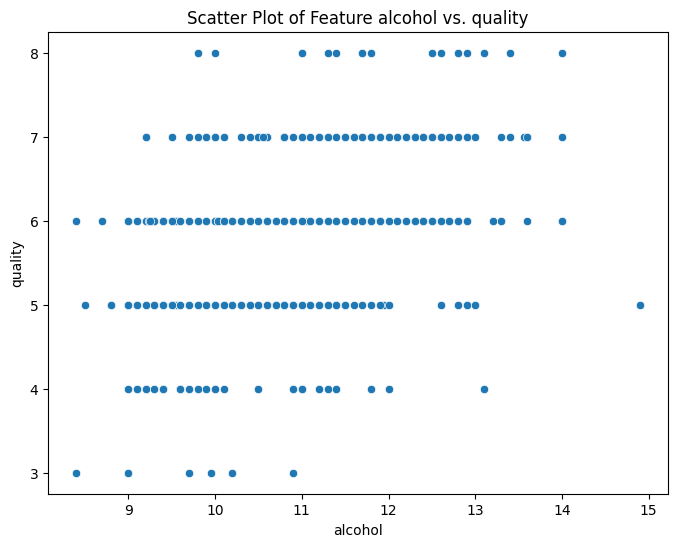

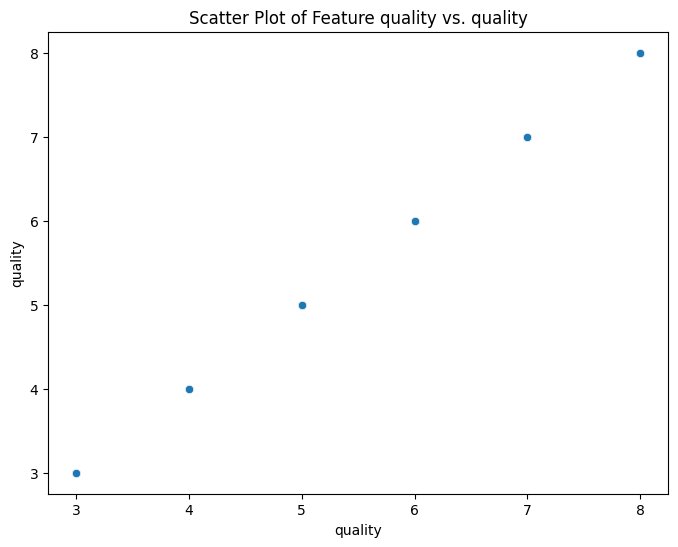

In [ ]:
for col in data.columns:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(x=col, y='quality', data=data)
    plt.title(f'Scatter Plot of Feature {col} vs. quality')
    plt.xlabel(col)
    plt.ylabel('quality')
    plt.show()

In [ ]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
plt.figure(figsize=(15, 8))
df_corr_bar = abs(data.corr()['quality']).sort_values()[:-1]
sb.barplot(x=df_corr_bar.index, y=df_corr_bar.values, palette="Blues_d").set_title('Feature Correlation Distribution According to Quality', fontsize=20)
plt.xticks(rotation=70, fontsize=14)
plt.show()

###
Some data procceessing and Engineering

In [ ]:
for col in data.columns:
    plt.figure(figsize=(8, 6))
    sb.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
data.groupby('quality').mean()

Trying to imporve model accuracy

In [ ]:
data['quality'].value_counts()

In [ ]:
df_yn=data.copy()
df_yn["good wine"] = ["No" if index < 6 else "Yes" for index in df_yn['quality']]
X = df_yn.drop(["quality"], axis = 1)
y = df_yn["good wine"]


In [ ]:
df_yn=data.copy()
df_yn["good wine"] = [0 if index < 6 else 1 for index in df_yn['quality']]
X = df_yn.drop(["quality"], axis = 1)
y = df_yn["good wine"]


In [ ]:
y.head()
y.value_counts()

Normalization

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = df_yn.copy()
x = normal_df.drop(columns=['quality'])
normal_df =  normal_df.drop(columns=['quality'])
x

In [ ]:
y = data['quality']
y

In [ ]:
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns=normal_df.columns)
x.head()


Buillding our model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)
print(f"x train shape : {x_train.shape}")
print(f"x test shape : {x_test.shape}")
print(f"Y train shape : {y_train.shape}")
print(f"Y test shape : {y_train.shape}")

In [ ]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=100, random_state=42)
rf_model.fit(x_train, y_train)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
y_predict = list(rf_model.predict(x_test))
predicted_df = {'predicted': y_predict, 'original': y_test}
predicted_df=pd.DataFrame(predicted_df)
predicted_df.head()

In [ ]:
predicted_df['error']= [True if row['original']==row['predicted'] else False for index,row in predicted_df.iterrows()]
predicted_df.head()

In [ ]:
predicted_df['error'].value_counts()

In [ ]:
predicted_df=predicted_df.drop(columns="predicted",axis=1)
predicted_df.head()

In [ ]:
color = ['#3498DB', '#E74C3C']
test = predicted_df.groupby(['original', 'error'])['original'].count().unstack('error').fillna(0)
test.plot(kind='bar', stacked=True, color=color)
plt.title('Prediction Error Rate According to Category', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.ylim(0)
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

In [ ]:
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
y_predict = list(knn_model.predict(x_test))
predicted_df = {'predicted': y_predict, 'original': y_test}
predicted_df=pd.DataFrame(predicted_df)
predicted_df.head()

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
y_predict = list(svm_model.predict(x_test))
predicted_df = {'predicted': y_predict, 'original': y_test}
predicted_df=pd.DataFrame(predicted_df)
predicted_df.head()

In [ ]:
Linear_Regression_model = LinearRegression()
Linear_Regression_model.fit(x_train, y_train)

In [ ]:
predictions = Linear_Regression_model.predict(x_test)
rounded_predictions = np.round(predictions)
mse = mean_squared_error(y_test, rounded_predictions)
print(f"Mean Squared Error (with rounding): {mse}")
rounded_predictions = rounded_predictions.astype(int)

In [ ]:
y_predict = list(rounded_predictions)
predicted_df = {'predicted': y_predict, 'original': y_test}
predicted_df=pd.DataFrame(predicted_df)
predicted_df.head()